In [2]:
import numpy as np
import pandas as pd

In [4]:
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv')

In [16]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [8]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.neighbors import KNeighborsRegressor

In [10]:
knn = KNeighborsRegressor()

In [18]:
kfold = KFold(n_splits=5, shuffle=True, random_state=1)
scores = cross_val_score(knn, X, y, cv=kfold, scoring='r2')

In [22]:
scores.mean()

0.4761976351913221

# GridSearchCV
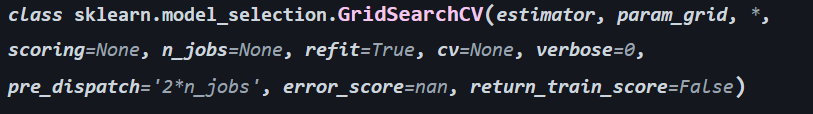
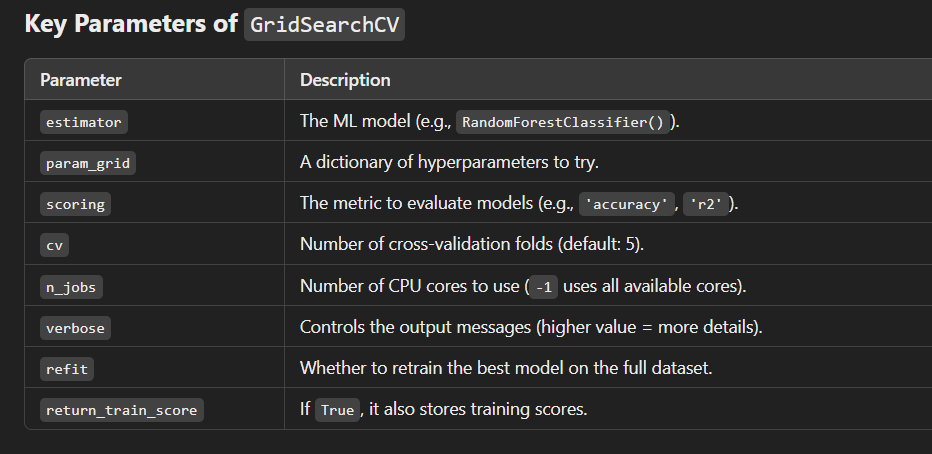

In [27]:
from sklearn.model_selection import GridSearchCV

In [29]:
knn = KNeighborsRegressor()


In [31]:
param_grid = {
    'n_neighbors':[1,3,5,7,10,12,15,17,20],
    'weights':['uniform','distance'],
    'algorithm':['ball_tree', 'kd_tree', 'brute'],
    'p':[1,2]
}

In [35]:
gcv=  GridSearchCV(knn, param_grid, scoring='r2', refit=True, cv=kfold , verbose=2)

In [37]:
gcv.fit(X, y)

Fitting 5 folds for each of 108 candidates, totalling 540 fits
[CV] END algorithm=ball_tree, n_neighbors=1, p=1, weights=uniform; total time=   0.0s
[CV] END algorithm=ball_tree, n_neighbors=1, p=1, weights=uniform; total time=   0.0s
[CV] END algorithm=ball_tree, n_neighbors=1, p=1, weights=uniform; total time=   0.0s
[CV] END algorithm=ball_tree, n_neighbors=1, p=1, weights=uniform; total time=   0.0s
[CV] END algorithm=ball_tree, n_neighbors=1, p=1, weights=uniform; total time=   0.0s
[CV] END algorithm=ball_tree, n_neighbors=1, p=1, weights=distance; total time=   0.0s
[CV] END algorithm=ball_tree, n_neighbors=1, p=1, weights=distance; total time=   0.0s
[CV] END algorithm=ball_tree, n_neighbors=1, p=1, weights=distance; total time=   0.0s
[CV] END algorithm=ball_tree, n_neighbors=1, p=1, weights=distance; total time=   0.0s
[CV] END algorithm=ball_tree, n_neighbors=1, p=1, weights=distance; total time=   0.0s
[CV] END algorithm=ball_tree, n_neighbors=1, p=2, weights=uniform; total

GridSearchCV(cv=KFold(n_splits=5, random_state=1, shuffle=True),
             estimator=KNeighborsRegressor(),
             param_grid={'algorithm': ['ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [1, 3, 5, 7, 10, 12, 15, 17, 20],
                         'p': [1, 2], 'weights': ['uniform', 'distance']},
             scoring='r2', verbose=2)

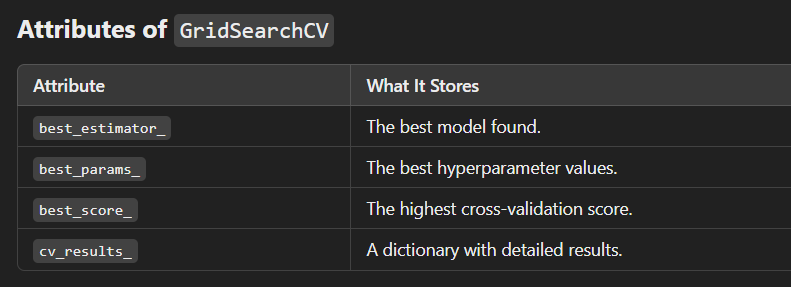

In [39]:
gcv.best_params_

{'algorithm': 'ball_tree', 'n_neighbors': 5, 'p': 1, 'weights': 'distance'}

In [58]:
gcv.best_score_

0.6117139367845081

In [43]:
gcv.cv_results_

{'mean_fit_time': array([0.00500469, 0.00432801, 0.00317607, 0.00331955, 0.00707073,
        0.00295281, 0.00300093, 0.0022017 , 0.00271482, 0.00338993,
        0.0030581 , 0.00229168, 0.00159993, 0.00359783, 0.00402837,
        0.0022079 , 0.00300589, 0.00300727, 0.00219235, 0.00200105,
        0.00328555, 0.0020493 , 0.00239816, 0.00347638, 0.00267138,
        0.00220532, 0.00260558, 0.00243301, 0.00224175, 0.00280223,
        0.00246553, 0.00229969, 0.00220289, 0.00239377, 0.00200543,
        0.00319676, 0.00379953, 0.00320005, 0.00259962, 0.00179963,
        0.00199614, 0.00199828, 0.00401158, 0.00339756, 0.00240211,
        0.00200438, 0.00200791, 0.00199656, 0.00239549, 0.00161791,
        0.00180631, 0.00200133, 0.00209866, 0.00306044, 0.00221171,
        0.00239472, 0.00319347, 0.00258722, 0.00241528, 0.00318675,
        0.00373759, 0.00220461, 0.00390091, 0.00269856, 0.00279856,
        0.00300055, 0.00450149, 0.00432763, 0.00608916, 0.00279956,
        0.00465198, 0.00389271,

In [56]:
pd.DataFrame(gcv.cv_results_).head(2)
# split0_test_score	split1_test_score	split2_test_score	split3_test_score 
# These are results of KFold CV

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_algorithm,param_n_neighbors,param_p,param_weights,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.005005,0.000902,0.005856,0.001826,ball_tree,1,1,uniform,"{'algorithm': 'ball_tree', 'n_neighbors': 1, '...",0.573689,0.286948,0.522222,0.308922,0.440975,0.426551,0.113434,88
1,0.004328,0.001094,0.007443,0.004848,ball_tree,1,1,distance,"{'algorithm': 'ball_tree', 'n_neighbors': 1, '...",0.573689,0.286948,0.522222,0.308922,0.440975,0.426551,0.113434,91


In [45]:
# For better understanding converting it to dataFrame
pd.DataFrame(gcv.cv_results_)[['param_algorithm',	'param_n_neighbors',	'param_p', 'param_weights', 'mean_test_score']].sort_values('mean_test_score',ascending=False)

,param_algorithm,param_n_neighbors,param_p,param_weights,mean_test_score
81,brute,5,1,distance,0.611714
45,kd_tree,5,1,distance,0.611714
9,ball_tree,5,1,distance,0.611714
49,kd_tree,7,1,distance,0.605716
85,brute,7,1,distance,0.605716
...,...,...,...,...,...
38,kd_tree,1,2,uniform,0.331522
2,ball_tree,1,2,uniform,0.331522
39,kd_tree,1,2,distance,0.331522
3,ball_tree,1,2,distance,0.331522


In [47]:
gcv.predict(new_data)

NameError: name 'new_data' is not defined

# RandomizedSearchCV
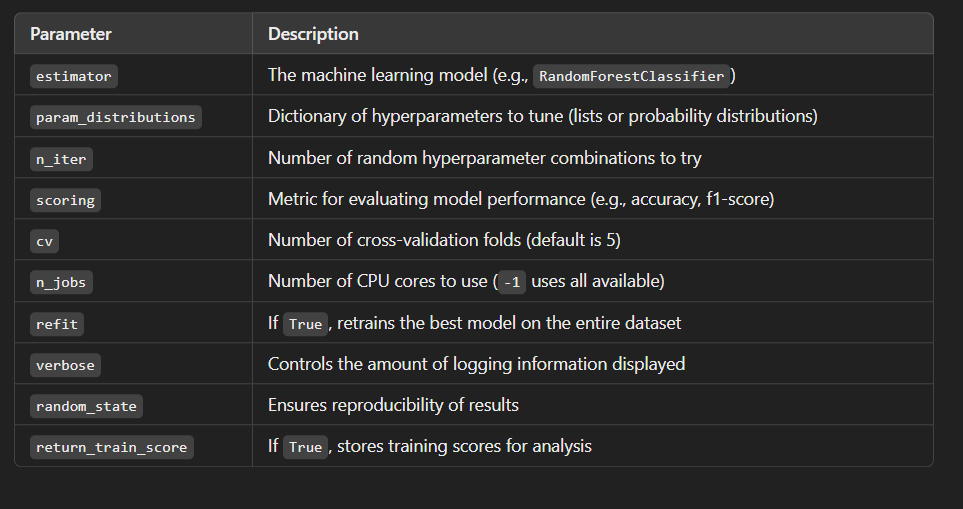

In [66]:
from sklearn.model_selection import RandomizedSearchCV


In [76]:
# Creating object
rcv = RandomizedSearchCV(knn, param_grid, scoring='r2', refit=True, cv=kfold, verbose=2)

In [70]:
rcv.fit(X, y)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END algorithm=kd_tree, n_neighbors=1, p=2, weights=uniform; total time=   0.0s
[CV] END algorithm=kd_tree, n_neighbors=1, p=2, weights=uniform; total time=   0.0s
[CV] END algorithm=kd_tree, n_neighbors=1, p=2, weights=uniform; total time=   0.0s
[CV] END algorithm=kd_tree, n_neighbors=1, p=2, weights=uniform; total time=   0.0s
[CV] END algorithm=kd_tree, n_neighbors=1, p=2, weights=uniform; total time=   0.0s
[CV] END algorithm=brute, n_neighbors=7, p=2, weights=uniform; total time=   0.0s
[CV] END algorithm=brute, n_neighbors=7, p=2, weights=uniform; total time=   0.0s
[CV] END algorithm=brute, n_neighbors=7, p=2, weights=uniform; total time=   0.0s
[CV] END algorithm=brute, n_neighbors=7, p=2, weights=uniform; total time=   0.0s
[CV] END algorithm=brute, n_neighbors=7, p=2, weights=uniform; total time=   0.0s
[CV] END algorithm=ball_tree, n_neighbors=3, p=1, weights=uniform; total time=   0.0s
[CV] END algorithm=ball

RandomizedSearchCV(cv=KFold(n_splits=5, random_state=1, shuffle=True),
                   estimator=KNeighborsRegressor(),
                   param_distributions={'algorithm': ['ball_tree', 'kd_tree',
                                                      'brute'],
                                        'n_neighbors': [1, 3, 5, 7, 10, 12, 15,
                                                        17, 20],
                                        'p': [1, 2],
                                        'weights': ['uniform', 'distance']},
                   scoring='r2', verbose=2)

In [72]:
rcv.best_score_

0.6057158068725681

In [74]:
rcv.best_params_

{'weights': 'distance', 'p': 1, 'n_neighbors': 7, 'algorithm': 'ball_tree'}

In [ ]:
best_model = random_search.best_estimator_  
y_pred = best_model.predict(X_test)